### Carichiamo un set di immagini

Per questo esempio le immagini vengono caricate all'interno di una cartella sul nostro Google Drive. Concederemo quindi a Google Colab di accedere a Google Drive per raggiungere le immagini

In [ ]:
# Chiede l'autorizzazione per accedere al nostro Google Drive
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In questo esempio le immagini si trovano all'interno della cartella di Drive "DATI/img-architecture/img-set".

A partire dalla cartella di origine otteniamo i path delle singole immagini e li inseriamo all'interno di una lista.



In [ ]:
import os

# funzione per estrarre i path dei singoli file

def find_path(folder_path):
  file_paths = []
  for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):
      file_paths.append(file_path)
  return file_paths

folder_path = "/content/gdrive/MyDrive/DATI/img-architecture/img-set"
file_paths = find_path(folder_path)

for path in file_paths:
  print(path)



/content/gdrive/MyDrive/DATI/img-architecture/img-set/Katholische_Kirche2.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/Matthaeuskirche_Ingolstadt.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/2012-03-04_Friedrikenkapelle_Bad_Rehburg,_(16)a.JPG
/content/gdrive/MyDrive/DATI/img-architecture/img-set/Ray_and_Maria_Stata_Center_(MIT).JPG
/content/gdrive/MyDrive/DATI/img-architecture/img-set/1024px-Église_Sainte-Thérèse_de_l'Enfant-Jésus_d'Amiens_3.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/neoclassica_1.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/neoclassica_2.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/gotica_1.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/00_TorinoGranMadreDio.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/22957-Gran_madre.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/Chiesa_Gran_Madre_di_Dio.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/g_madre_m4.jpg
/c

## Image similarity con Pytorch

Utilizziamo una serie di librerie per ottenere una ricerca che ordini le immagini per similitudine:

- PIL per aprire le immagini e lavorarle
- PyTorch per trasformare le immagini in tensori, estrarre le "feature" delle immagini ed eseguire le operazioni tra i tensori
- Numpy per trasformare le feature in matrici e "impilarle" nell'ordine corretto
- Scikit-Learn per calcolare la "cosine similarity" tra le diverse immagini



In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import numpy as np

# Carica il modello pre-addestrato ResNet-50
# model = resnet50(pretrained=True) deprecato, non usare
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
model.eval()

# Impostia il percorso alla cartella che contiene le immagini
image_paths = find_path("/content/gdrive/MyDrive/DATI/img-architecture/img-set")

# Ridimensiona le immagini e le trasforma in tensori
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Estrae gli attributi delle immagini
image_features = []
for image_path in image_paths:
    image = Image.open(image_path).convert('RGB')
    image_tensor = preprocess(image)
    image_tensor = torch.unsqueeze(image_tensor, 0)
    with torch.no_grad():
        features = model(image_tensor)
        features = torch.flatten(features, start_dim=1).numpy()
        image_features.append(features)

# Converte gli attributi in matrici
feature_matrix = np.vstack(image_features)

# Calcola la similarità del coseno
similarity_matrix = cosine_similarity(feature_matrix, feature_matrix)

# Esegua la ricerca per similitudine
query_index = 8  # Indica l'indice dell'immagine-query
similar_images = similarity_matrix[query_index].argsort()[::-1]

# Stampa il nome del file dell'immagine-query
query_image_filename = os.path.basename(image_paths[query_index])
print("Immagine query:", query_image_filename)

# Stampa i nomi dei file delle immagini simili, in ordine di similitudine
print("Immagini simili all'immagine-query:")
for index in similar_images:
    print(image_paths[index])


Immagine query: 00_TorinoGranMadreDio.jpg
Immagini simili all'immagine-query:
/content/gdrive/MyDrive/DATI/img-architecture/img-set/00_TorinoGranMadreDio.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/22957-Gran_madre.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/g_madre_m4.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/Chiesa_Gran_Madre_di_Dio.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/gran_madre_notturna.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/neoclassica_2.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/gotica_1.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/Matthaeuskirche_Ingolstadt.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/neoclassica_1.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/Katholische_Kirche2.jpg
/content/gdrive/MyDrive/DATI/img-architecture/img-set/2012-03-04_Friedrikenkapelle_Bad_Rehburg,_(16)a.JPG
/content/gdrive/MyDrive/DATI/img-architecture/img-set/102

### Visualizzazione dei risultati con anteprima delle immagini

IMMAGINE QUERY: 00_TorinoGranMadreDio.jpg


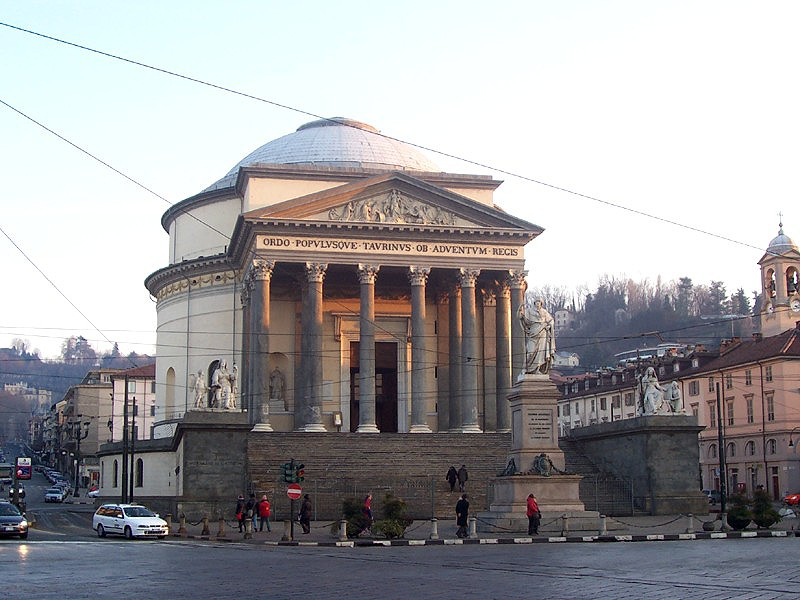

IMMAGINI IN ORDINE DI SIMILITUDINE:


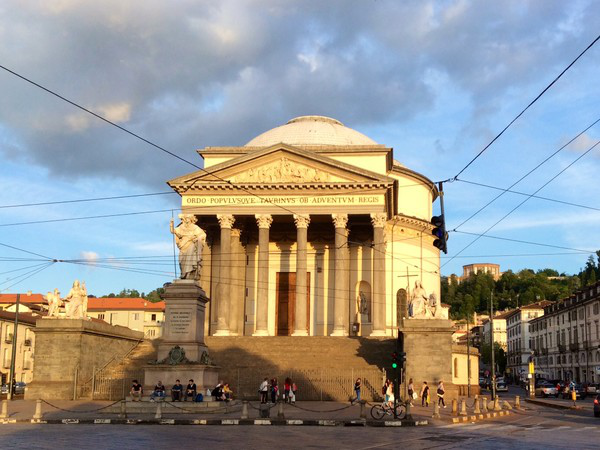

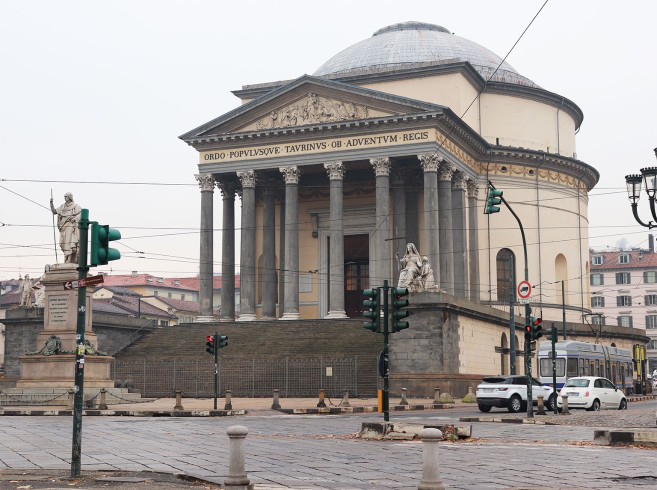

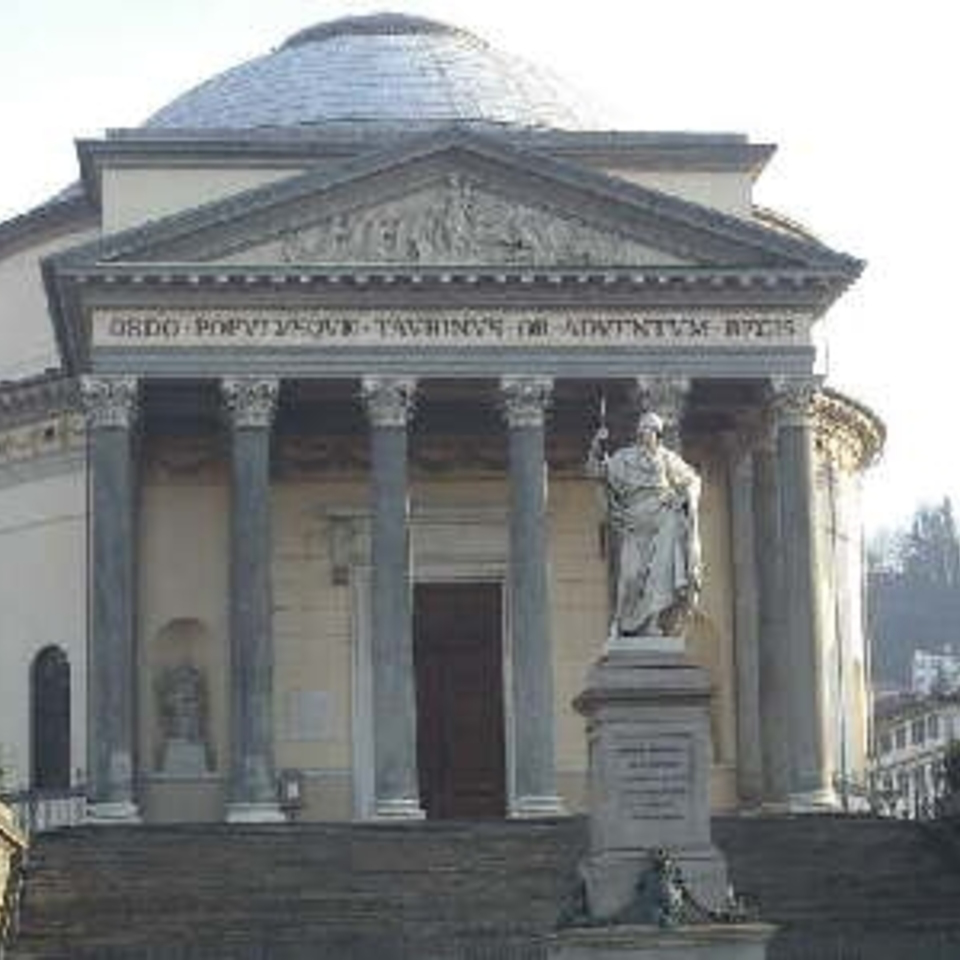

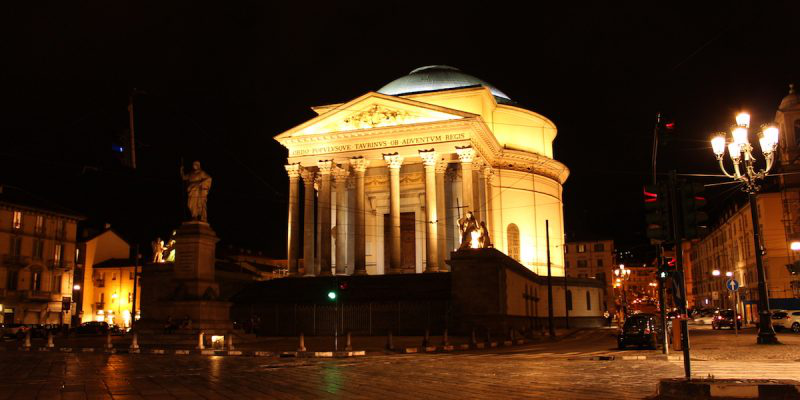

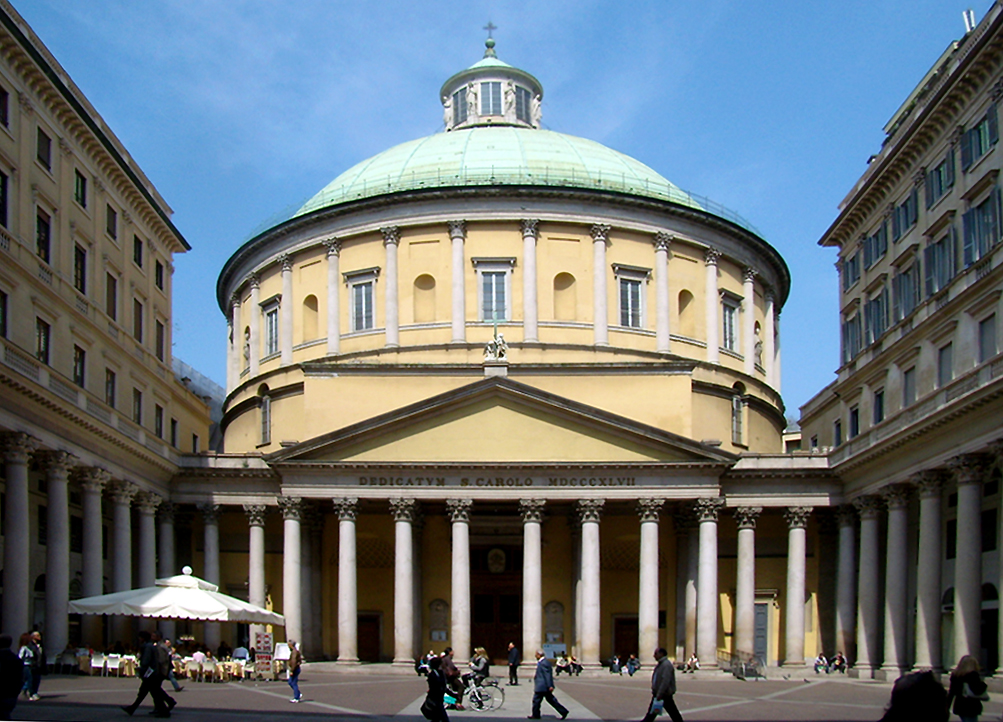

In [ ]:
# Stampa l'anteprima dell'immagine-query
query_image_filename = os.path.basename(image_paths[query_index])
print("IMMAGINE QUERY:", query_image_filename)
query_image = Image.open(image_paths[query_index])
display(query_image)

# Stampa le anteprime delle immagini simili, in ordine di similitudine
print("IMMAGINI IN ORDINE DI SIMILITUDINE:")
for index in similar_images:
    if index == query_index:
        continue
    similar_image = Image.open(image_paths[index])
    display(similar_image)

### Diversa visualizzazione


IMMAGINE QUERY: 00_TorinoGranMadreDio.jpg
IMMAGINI IN ORDINE DI SIMILITUDINE:


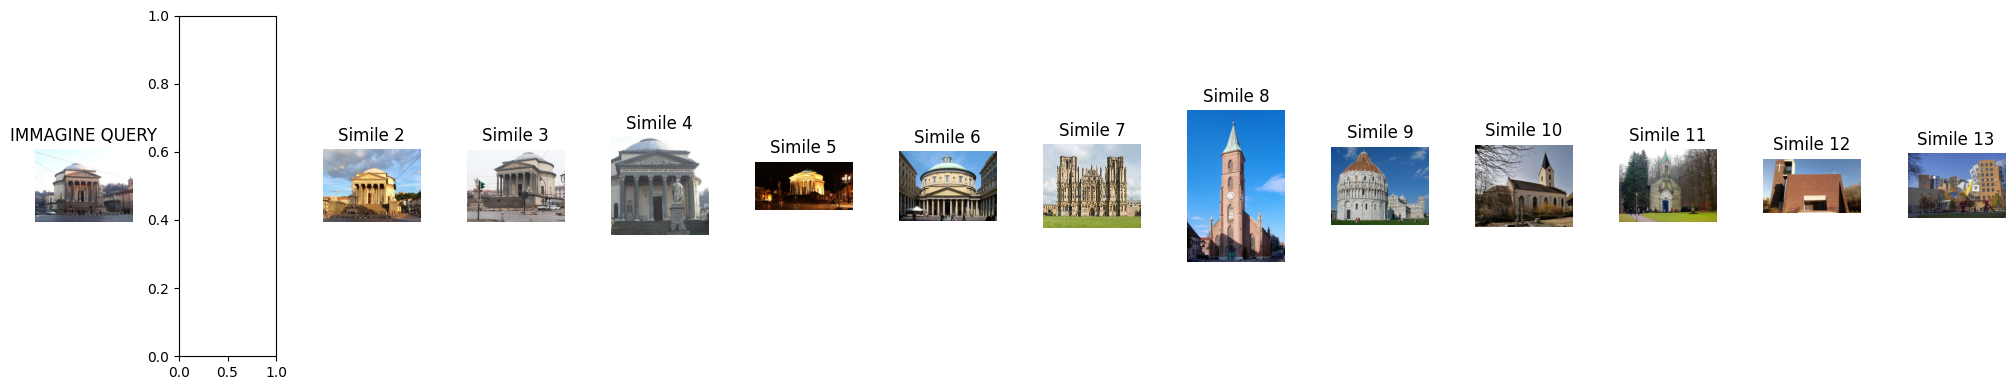

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Carica l'immagine query
query_image_filename = os.path.basename(image_paths[query_index])
print("IMMAGINE QUERY:", query_image_filename)
query_image = Image.open(image_paths[query_index])

# Stampa le anteprime delle immagini in ordine di similitudine
print("IMMAGINI IN ORDINE DI SIMILITUDINE:")

num_similar_images = len(similar_images)
num_subplots = num_similar_images + 1

fig, axs = plt.subplots(1, num_subplots, figsize=(20, 4))

axs[0].imshow(query_image)
axs[0].set_title("IMMAGINE QUERY")
axs[0].axis('off')

for i, index in enumerate(similar_images):
    if index == query_index:
        continue
    if i >= num_similar_images:
        break
    similar_image = Image.open(image_paths[index])
    axs[i+1].imshow(similar_image)
    axs[i+1].set_title(f"Simile {i+1}")
    axs[i+1].axis('off')

for j in range(num_similar_images + 1, num_subplots):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


## APPENDICE: Esempio di trasformazione di un'immagine in tensore

In [ ]:
import torch
import pandas as pd

image_8 = Image.open("/content/gdrive/MyDrive/DATI/img-architecture/img-set/00_TorinoGranMadreDio.jpg").convert('RGB')

# Ridimensiona le immagini e le trasforma in tensori
preprocess_REDUCED = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_8_tensor = preprocess(image)

image_8_tensor_2d = image_8_tensor.reshape(3, 50176)

# Convert the tensor to a DataFrame
df = pd.DataFrame(image_8_tensor_2d.numpy())

# Display the DataFrame
print(df)

      0         1         2         3         4         5         6      \
0  1.666667  1.666667  1.683791  1.683791  1.683791  1.700916  1.700916   
1  2.288516  2.306022  2.288516  2.306022  2.306022  2.306022  2.306022   
2  2.517996  2.517996  2.535425  2.535425  2.517996  2.535425  2.535425   

      7         8         9      ...     50166     50167     50168     50169  \
0  1.700916  1.718041  1.718041  ... -0.371179 -0.371179 -0.371179 -0.371179   
1  2.306022  2.323529  2.306022  ... -0.109944 -0.109944 -0.109944 -0.109944   
2  2.535425  2.535425  2.535425  ...  0.391634  0.391634  0.391634  0.391634   

      50170     50171     50172     50173     50174     50175  
0 -0.371179 -0.388304 -0.388304 -0.388304 -0.388304 -0.405429  
1 -0.127451 -0.127451 -0.127451 -0.144958 -0.144958 -0.144958  
2  0.374205  0.374205  0.374205  0.356776  0.356776  0.339346  

[3 rows x 50176 columns]


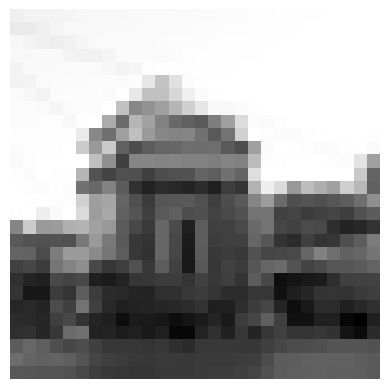

In [ ]:
import matplotlib.pyplot as plt

image = Image.open("/content/gdrive/MyDrive/DATI/img-architecture/img-set/00_TorinoGranMadreDio.jpg").convert('RGB')

image = image.resize((28, 28), Image.ANTIALIAS)  # Ridimensiona l'immagine alla dimensione desiderata

# Converti l'immagine in scala di grigi
image_gray = image.convert("L")

# Ottieni i valori di intensità dei pixel come una matrice numpy
pixel_values = np.array(image_gray)

# Visualizza il tensore con celle in bianco e nero
plt.imshow(pixel_values, cmap='gray', interpolation='nearest')
plt.axis('off')  # Rimuovi gli assi x e y
plt.show()

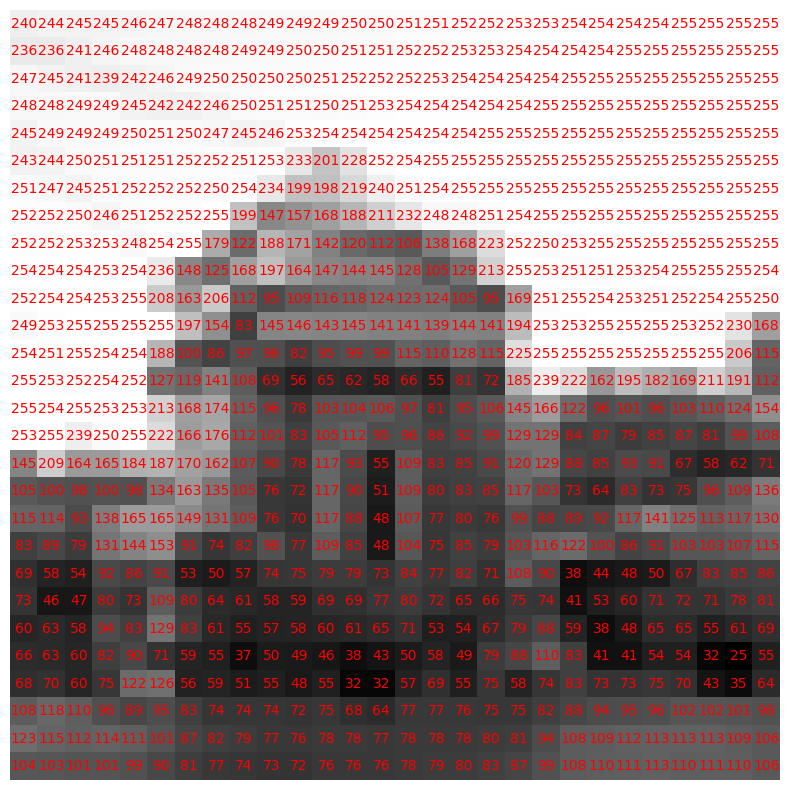

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Apri l'immagine e ridimensiona alla dimensione desiderata (ad esempio, 28x28)
image_path = "/content/gdrive/MyDrive/DATI/img-architecture/img-set/00_TorinoGranMadreDio.jpg"  # Sostituisci con il percorso dell'immagine desiderata
image = Image.open(image_path)
image = image.resize((28, 28), Image.ANTIALIAS)  # Ridimensiona l'immagine alla dimensione desiderata

# Converti l'immagine in scala di grigi
image_gray = image.convert("L")

# Ottieni i valori di intensità dei pixel come una matrice numpy
pixel_values = np.array(image_gray)

# Creazione della visualizzazione combinata con dimensioni personalizzate
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Visualizza il tensore con celle in bianco e nero
ax.imshow(pixel_values, cmap='gray', interpolation='nearest')

# Aggiungi il valore numerico di ogni pixel come testo
for i in range(pixel_values.shape[0]):
    for j in range(pixel_values.shape[1]):
        ax.text(j, i, str(pixel_values[i, j]), ha='center', va='center', color='red')

# Rimuovi gli assi x e y
ax.axis('off')

# Mostra la visualizzazione combinata
plt.show()
